In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [10]:
meteo = pd.read_csv("./data/final/data-meteo.csv", sep=';').drop_duplicates()
airquality = pd.read_csv("./data/final/data-air-quality.csv", sep=';').drop_duplicates()
trafic = pd.read_csv("./data/dataTraffic.csv").drop("Unnamed: 0", axis=1).drop_duplicates()

def parse_date(row):
    return row[3] + " " + ":".join(row[4].split(":")[:2])

trafic["date"] = trafic.apply(parse_date, axis=1)
trafic.columns = ["_", "ville", "debit_horaire", "day", "hour", "date"]
trafic = trafic[["date", "day", "ville", "debit_horaire"]]
trafic = trafic[trafic.ville == "75013 Paris"]

In [11]:
startdate = datetime.strptime("2019-01-01 00:00", "%Y-%m-%d %H:%M")
enddate = datetime.strptime("2021-12-11 00:00", "%Y-%m-%d %H:%M")
days = [datetime.strftime(startdate + timedelta(hours=i), "%Y-%m-%d %H:%M") for i in range((enddate - startdate).days*24 + 1)]
df_days = pd.DataFrame(days, columns=["date"])

In [24]:
# Without traffic

df = pd.merge(airquality, meteo, on="date", how="inner")
df = pd.merge(df, df_days, on="date", how="outer")
df["day"] = df.date.apply(lambda x: x.split(" ")[0])
df = df[['date', 'day', 'PM10', 'PM25', 'NO2', 'SO2', 'NO', 'NOX', 'O3', 'ATMO', 'temp', 'wind_speed',
         'wind_dir', 'hum', 'press', 'weather_event']]
df.date = pd.to_datetime(df.date)
df.day = pd.to_datetime(df.day)
df = df.sort_values(by="date").drop(5254)
df = df.astype({"ATMO": "category", "weather_event": "category"})
#df = df.dropna(subset=['PM10', 'PM25', 'NO2', 'SO2', 'NO', 'NOX', 'O3', 'ATMO', 'temp', 'wind_speed',
#                       'wind_dir', 'hum', 'press', 'weather_event'], how="all")
df = df.reset_index(drop=True).drop(0)

In [7]:
# With traffic

df = pd.merge(airquality, meteo, on="date", how="inner")
df = pd.merge(df, trafic, on=["date", "day"], how="outer")
df = pd.merge(df, df_days, on="date", how="outer")
df["day"] = df.date.apply(lambda x: x.split(" ")[0])
df = df[['date', 'day', 'PM10', 'PM25', 'NO2', 'SO2', 'NO', 'NOX', 'O3', 'ATMO', 'temp', 'wind_speed', 
         'wind_dir', 'hum', 'press', 'weather_event', 'debit_horaire']]
df.date = pd.to_datetime(df.date)
df = df.sort_values(by="date")
df.day = pd.to_datetime(df.day).drop(5254)
#df = df.dropna(subset=['PM10', 'PM25', 'NO2', 'SO2', 'NO', 'NOX', 'O3', 'ATMO', 'temp', 'wind_speed', 
#                       'wind_dir', 'hum', 'press', 'weather_event', 'debit_horaire'], how="all")

In [25]:
df

,date,day,PM10,PM25,NO2,SO2,NO,NOX,O3,ATMO,temp,wind_speed,wind_dir,hum,press,weather_event
1,2019-01-01 01:00:00,2019-01-01,5.9,9.2,18.6,2.4,1.3,20.7,41.8,bon,8.2,3.7,ONO,84.0,1036.0,inconnu
2,2019-01-01 02:00:00,2019-01-01,5.4,10.3,19.7,2.3,1.4,21.9,39.8,bon,7.9,3.7,NNO,90.0,1036.2,inconnu
3,2019-01-01 03:00:00,2019-01-01,8.6,12.9,24.3,2.1,0.7,25.4,32.8,bon,7.7,3.7,O,88.0,1035.8,inconnu
4,2019-01-01 04:00:00,2019-01-01,10.2,12.5,25.4,2.6,1.0,27.0,36.6,bon,7.9,3.7,ONO,82.0,1035.4,inconnu
5,2019-01-01 05:00:00,2019-01-01,11.1,6.9,18.2,3.1,0.6,19.2,48.9,bon,8.0,3.7,O,81.0,1034.8,inconnu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,2021-12-30 17:00:00,2021-12-30,11.4,8.1,23.9,0.9,1.5,26.2,25.2,bon,13.9,14.8,SO,87.0,1022.3,ciel clair
26273,2021-12-30 18:00:00,2021-12-30,10.8,7.5,27.7,0.6,2.3,31.2,20.9,bon,14.0,14.8,SSO,87.0,1022.7,ciel clair
26274,2021-12-30 19:00:00,2021-12-30,11.9,8.4,25.8,0.6,1.1,27.6,21.2,bon,13.4,13.0,SSO,88.0,1022.8,ciel clair
26275,2021-12-30 20:00:00,2021-12-30,11.8,8.8,31.1,0.6,1.1,32.9,14.2,bon,12.5,11.1,SSO,91.0,1022.9,ciel clair


In [23]:
# Check that 1 sample = 1 hour
(df.date.value_counts()==1).all()

True

In [32]:
df.to_csv("./data/final/merged-final.csv", index=False, sep=';')

<BarContainer object of 4 artists>

Text(0.5, 1.0, "Répartition de l'indice ATMO moyen")

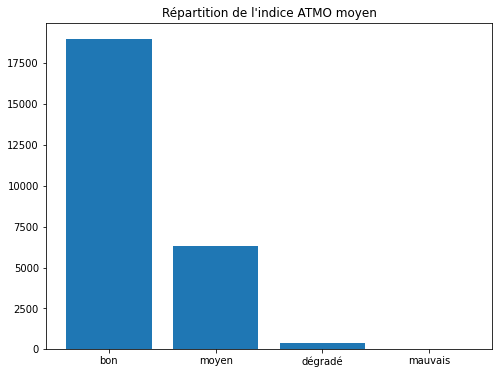

In [44]:
indices_dict = df.ATMO.value_counts().to_dict()
indices = list(indices_dict.keys())
indices_values = list(indices_dict.values())

f = plt.figure(figsize=(8,6))
plt.bar(indices, indices_values)
plt.title("Répartition de l'indice ATMO moyen")
plt.show()

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'Répartition des évènements météo (hors inconnu)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

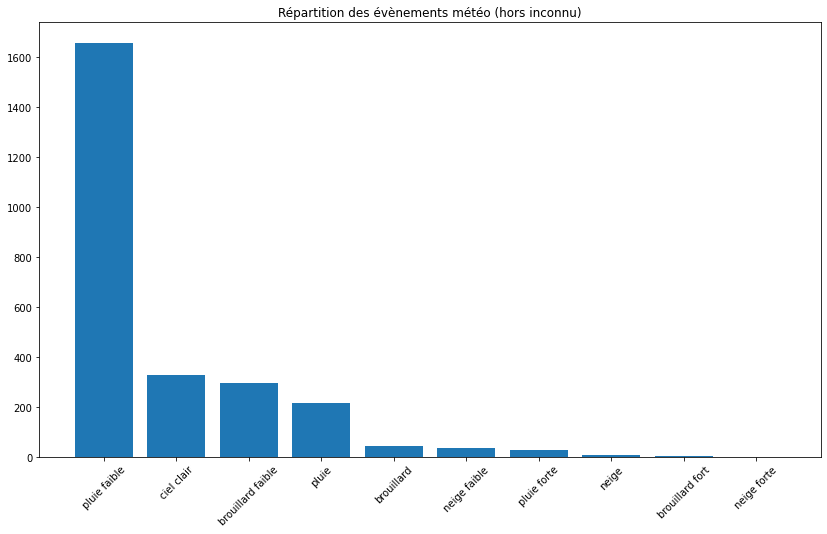

In [45]:
events_dict = df.weather_event.value_counts().to_dict()
events = list(events_dict.keys())[1:]
events_values = list(events_dict.values())[1:]

f = plt.figure(figsize=(14,8))
plt.bar(events, events_values)
plt.title("Répartition des évènements météo (hors inconnu)")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Corrélation des paramètres\n')

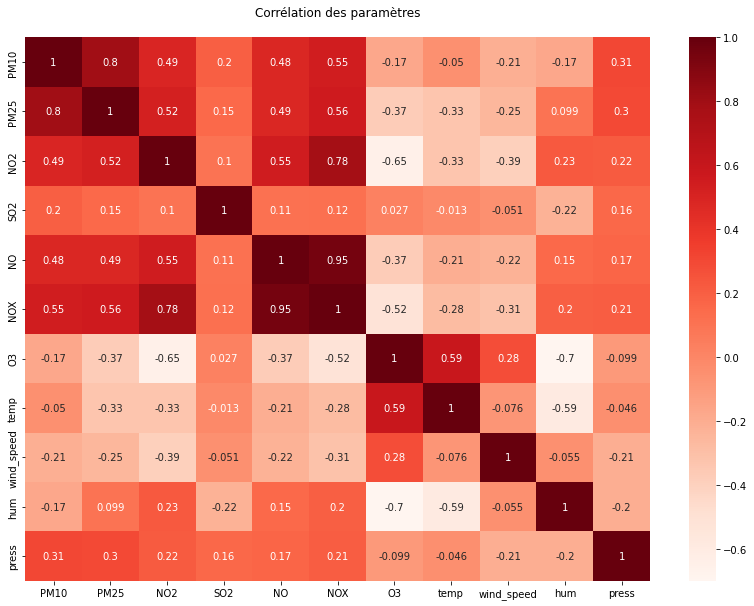

In [19]:
f = plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title("Corrélation des paramètres\n")
plt.show()

Text(0.5, 1.0, 'Évolution de PM10 selon le temps')

Text(0.5, 1.0, 'Évolution de PM25 selon le temps')

Text(0.5, 1.0, 'Évolution de SO2 selon le temps')

Text(0.5, 1.0, 'Évolution de NO2 selon le temps')

Text(0.5, 1.0, 'Évolution de O3 selon le temps')

Text(0.5, 1.0, 'Évolution de temp selon le temps')

Text(0.5, 1.0, 'Évolution de hum selon le temps')

Text(0.5, 1.0, 'Évolution de wind_speed selon le temps')

Text(0.5, 1.0, 'Évolution de press selon le temps')

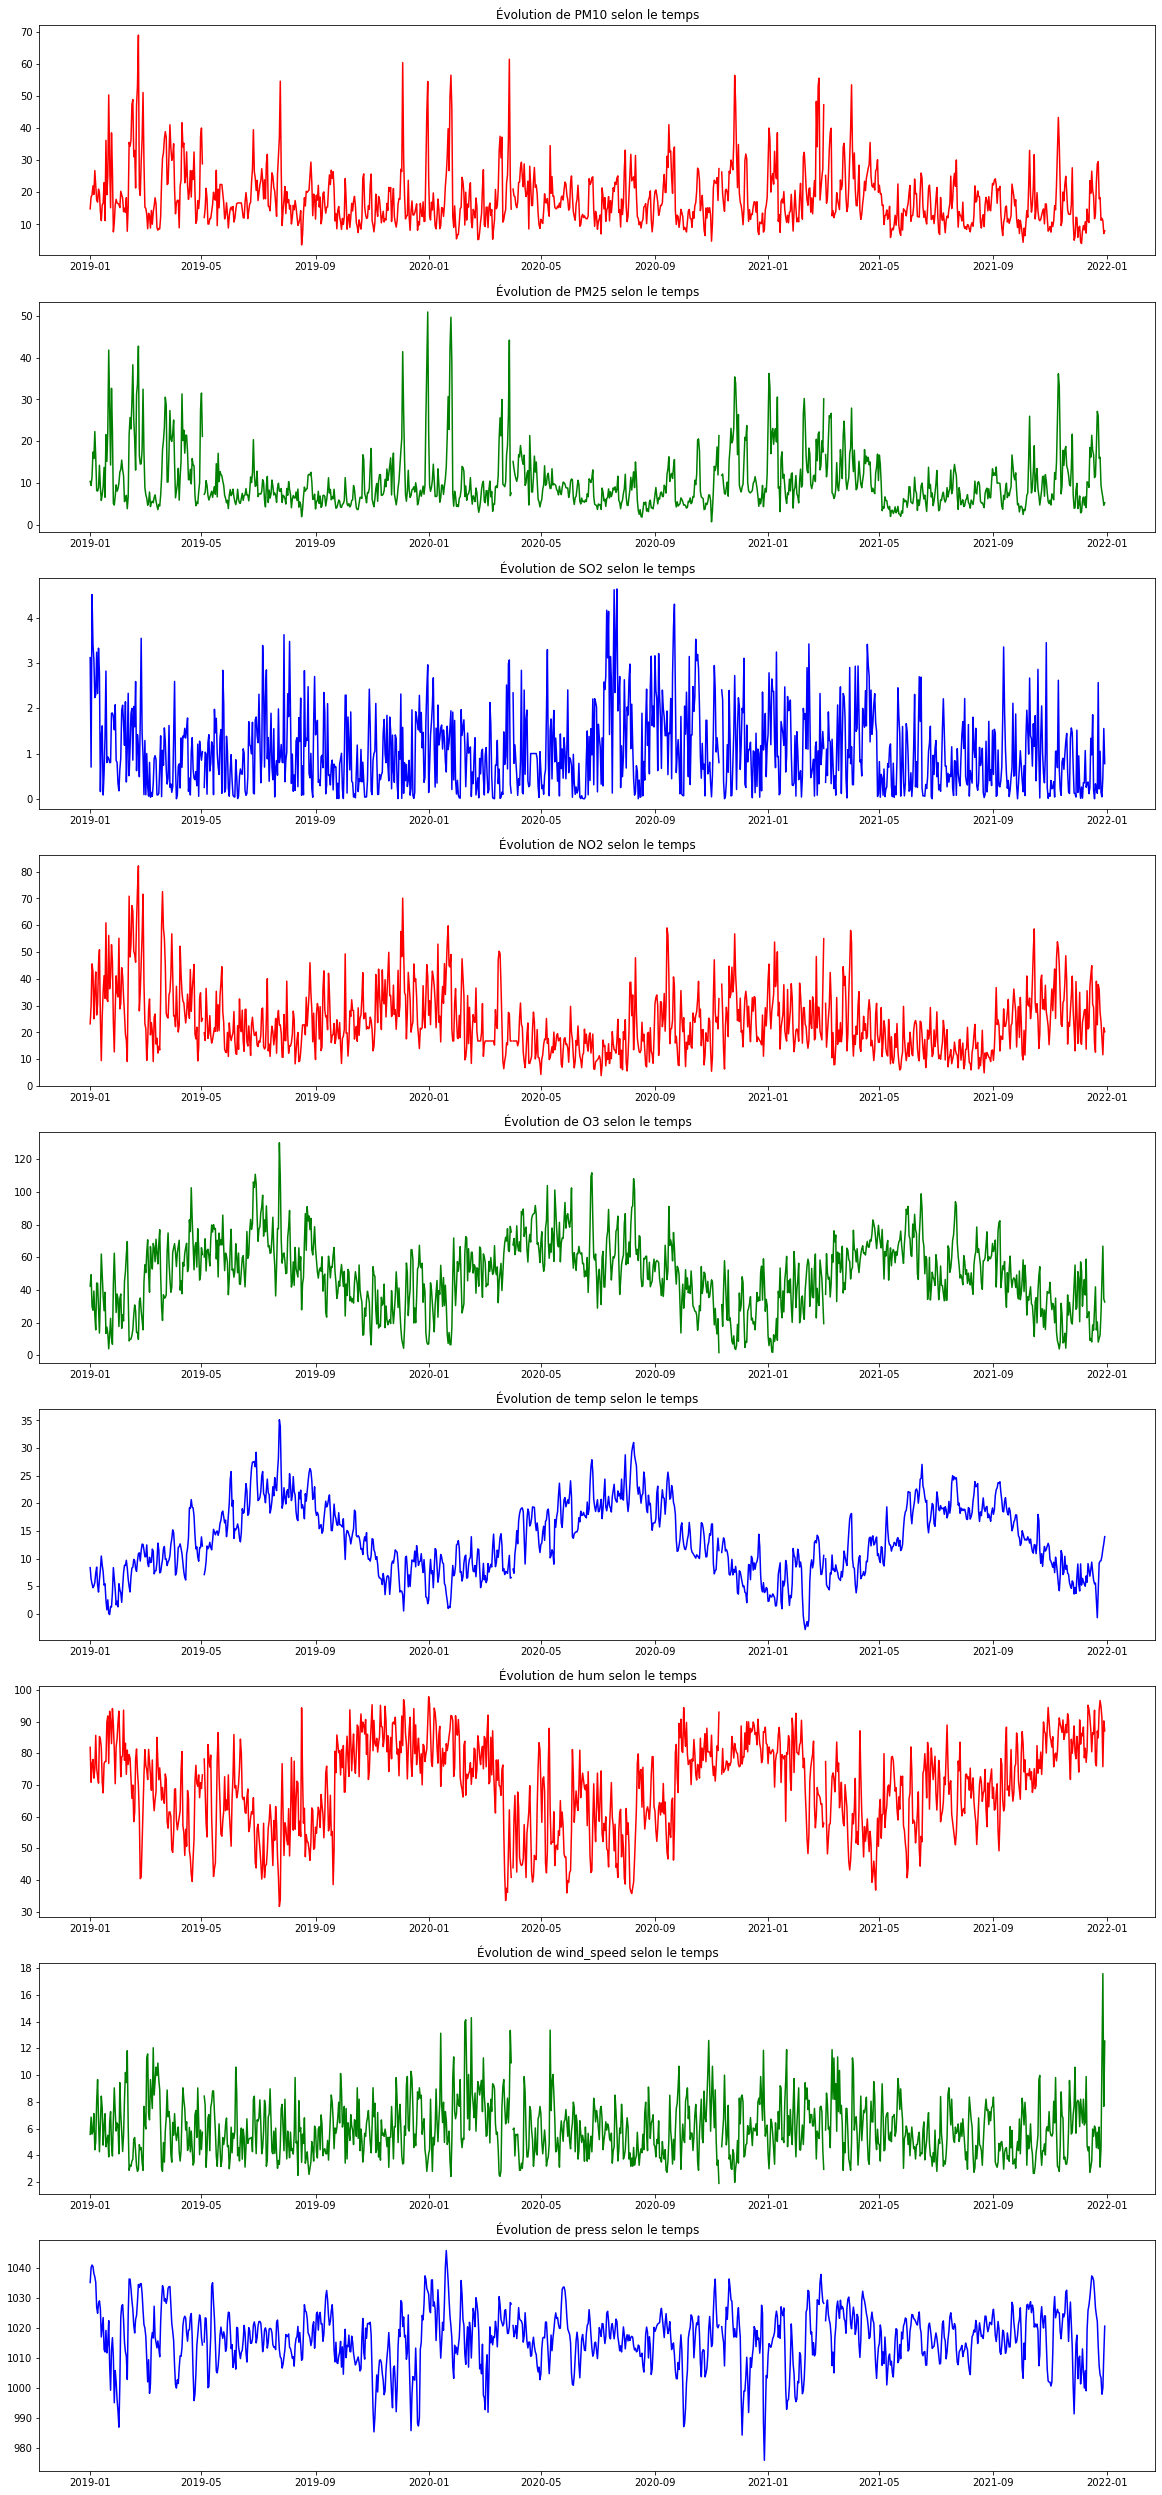

In [67]:
gb = df.groupby("day").mean()

features = ["PM10", "PM25", "SO2", "NO2", "O3", "temp", "hum", "wind_speed", "press"]
colors = ["r", "g", "b"]
f, ax = plt.subplots(len(features), 1, figsize=(20, 5*len(features)))

for i, feat in enumerate(features):
    ax[i].plot(gb.index, gb[feat], c=colors[i%3])
    ax[i].set_title(f"Évolution de {feat} selon le temps")

plt.show()

In [46]:
df.isnull().sum() * 100 / len(df)

date              0.000000
day               0.000000
PM10              2.184420
PM25              2.184420
NO2               2.184420
SO2               2.184420
NO                2.184420
NOX               2.184420
O3                2.184420
ATMO              2.184420
temp              2.192031
wind_speed        2.184420
wind_dir          2.184420
hum               2.534536
press             2.184420
weather_event     2.184420
debit_horaire    81.550405
dtype: float64